In [1]:
#import package
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import ensemble, metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math
from matplotlib import pyplot as plt
import matplotlib

In [2]:
# 開啟 CSV 檔案
dataset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

In [3]:
dataset.head()

,ID,G1,G2,G3,G4,G5,T1,T2,T3,T4,...,R3,R4,R5,R6,R7,O1,O2,O3,O4,Y
0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,2,0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,3,1,1,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,4,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,5,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [4]:
dataset.isna().sum()

ID     0
G1     0
G2     0
G3     0
G4     0
G5     0
T1     0
T2     0
T3     0
T4     0
T5     0
T6     0
T7     0
T8     0
T9     0
T10    0
T11    0
T12    0
T13    0
T14    0
T15    0
T16    0
T17    0
T18    0
T19    0
T20    0
T21    0
T22    0
T23    0
T24    0
T25    0
T26    0
T27    0
T28    0
T29    0
T30    0
R1     0
R2     0
R3     0
R4     0
R5     0
R6     0
R7     0
O1     0
O2     0
O3     0
O4     0
Y      0
dtype: int64

In [5]:
dataset.groupby('Y').size()

Y
1    1732
2     194
3     953
dtype: int64

In [6]:
import seaborn as sns

C:\Users\HHW\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y', ylabel='count'>

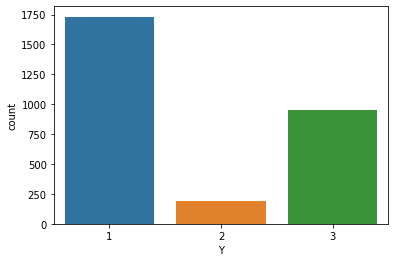

In [7]:
sns.countplot(dataset['Y'])

In [8]:
from sklearn.utils import resample

In [9]:
major = dataset[dataset.Y==1]
minor = dataset[dataset.Y==2]
med = dataset[dataset.Y==3]
minor_upsample = resample(minor, n_samples=1732, random_state=42)
med_upsample = resample(med, n_samples=1732, random_state=42)

In [10]:
df_upsample = pd.concat([major, minor_upsample, med_upsample])

In [11]:
df_upsample

,ID,G1,G2,G3,G4,G5,T1,T2,T3,T4,...,R3,R4,R5,R6,R7,O1,O2,O3,O4,Y
0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,2,0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,3,1,1,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,4,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,5,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2204,1,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,3
2160,2161,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
2419,2420,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,3
1929,1930,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,3


C:\Users\HHW\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y', ylabel='count'>

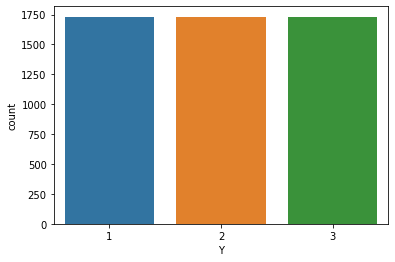

In [12]:
sns.countplot(df_upsample.Y)

In [13]:
df_upsample.to_csv('upsample.csv', index = False)

In [50]:
dataset = pd.read_csv('upsample.csv')

In [51]:
dataset

,ID,G1,G2,G3,G4,G5,T1,T2,T3,T4,...,R3,R4,R5,R6,R7,O1,O2,O3,O4,Y
0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,2,0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,3,1,1,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,4,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,5,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,2204,1,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,3
5192,2161,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
5193,2420,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,3
5194,1930,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,3


In [52]:
#將dataset shuffle
dataset =shuffle(dataset)
label = dataset.Y
dataset = dataset[dataset.columns[1:47]]

In [53]:
dataset

,G1,G2,G3,G4,G5,T1,T2,T3,T4,T5,...,R2,R3,R4,R5,R6,R7,O1,O2,O3,O4
2241,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1284,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1130,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4519,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4872,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5153,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
718,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
952,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [54]:
#random forest
#引入library
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

#10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True)
predicted = []
expected = []

#訓練模型
for train, test in kfold.split(dataset):
    x_train = dataset.iloc[train]
    y_train = label.iloc[train]
    x_test = dataset.iloc[test]
    y_test = label.iloc[test]
    forest = ensemble.RandomForestClassifier(n_estimators = 1000)
    forest.fit(x_train,y_train)
    expected.extend(y_test)
    predicted.extend(forest.predict(x_test))


In [55]:
print("TRAIN:", train, "TEST:",test)

TRAIN: [   0    2    3 ... 5192 5193 5195] TEST: [   1   13   17   18   34   56   57   60   70   73   94   99  103  109
  118  122  130  152  160  167  192  212  215  219  221  230  239  252
  258  261  262  320  322  338  352  354  358  366  397  399  401  403
  405  414  447  468  481  483  504  507  508  510  531  534  535  536
  552  565  573  582  590  593  608  630  643  654  656  658  667  672
  674  695  702  709  716  729  732  746  772  778  803  811  824  828
  838  853  873  880  891  909  933  944  947  948  949  951  953  976
  983  996  997 1008 1021 1028 1031 1047 1050 1051 1059 1063 1074 1081
 1101 1108 1121 1167 1183 1191 1203 1204 1209 1215 1217 1218 1227 1234
 1240 1260 1261 1265 1297 1319 1320 1332 1337 1340 1345 1354 1374 1383
 1387 1404 1418 1447 1450 1453 1455 1470 1472 1486 1491 1516 1522 1534
 1541 1551 1555 1561 1563 1566 1570 1571 1572 1576 1578 1579 1595 1601
 1604 1605 1608 1611 1613 1622 1643 1648 1653 1657 1666 1681 1686 1694
 1699 1701 1704 1709 1717 17

In [56]:
print("Macro-average: {0}".format(metrics.f1_score(expected,predicted,average='macro')))
print("Micro-average: {0}".format(metrics.f1_score(expected,predicted,average='micro')))
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy = accuracy_score(expected, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("Average = macro")
print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
print('recall:',metrics.recall_score(expected, predicted,average='macro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='macro'))

print("\n")
print("Average = micro")
print('precision:', metrics.precision_score(expected, predicted, average='micro')) 
print('recall:',metrics.recall_score(expected, predicted,average='micro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='micro'))

print("\n")
print("Average = weighted")
print('precision:', metrics.precision_score(expected, predicted, average='weighted'))
print('recall:',metrics.recall_score(expected, predicted,average='weighted'))
print('F1-score:',metrics.f1_score(expected,predicted,labels=[1,2,3,4],average='weighted'))

Macro-average: 0.7095745206307497
Micro-average: 0.7153579676674365
              precision    recall  f1-score   support

           1       0.62      0.47      0.54      1732
           2       0.95      0.99      0.97      1732
           3       0.58      0.69      0.63      1732

    accuracy                           0.72      5196
   macro avg       0.71      0.72      0.71      5196
weighted avg       0.71      0.72      0.71      5196

[[ 821   45  866]
 [  12 1709   11]
 [ 496   49 1187]]
Accuracy: 71.54%
Average = macro
precision: 0.7135730939283663
recall: 0.7153579676674365
F1-score: 0.5321808904730623


Average = micro
precision: 0.7153579676674365
recall: 0.7153579676674365
F1-score: 0.7153579676674365


Average = weighted
precision: 0.7135730939283664
recall: 0.7153579676674365
F1-score: 0.7095745206307497


C:\Users\HHW\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HHW\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [70]:
%precision 3
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x_train: round(x_train, 4), forest.feature_importances_), x_train.columns), 
reverse=True))

Features sorted by their score:
[(0.2739, 'T30'), (0.1294, 'O4'), (0.0803, 'G4'), (0.0653, 'T1'), (0.0576, 'R7'), (0.0466, 'R6'), (0.0455, 'O2'), (0.0339, 'O3'), (0.0235, 'T11'), (0.0232, 'R5'), (0.022, 'T7'), (0.0217, 'G1'), (0.021, 'G3'), (0.0207, 'G2'), (0.0181, 'R1'), (0.0169, 'T8'), (0.0106, 'T24'), (0.0103, 'T5'), (0.0098, 'T2'), (0.0097, 'G5'), (0.0085, 'O1'), (0.0075, 'T18'), (0.006, 'T19'), (0.006, 'R4'), (0.0051, 'R3'), (0.005, 'T13'), (0.0049, 'T29'), (0.0027, 'T3'), (0.0024, 'T14'), (0.0019, 'T10'), (0.0013, 'T4'), (0.0013, 'T12'), (0.0013, 'R2'), (0.0012, 'T9'), (0.0009, 'T6'), (0.0007, 'T21'), (0.0004, 'T28'), (0.0004, 'T23'), (0.0004, 'T20'), (0.0004, 'T17'), (0.0003, 'T27'), (0.0003, 'T26'), (0.0003, 'T16'), (0.0003, 'T15'), (0.0001, 'T25'), (0.0001, 'T22')]


In [63]:
importance = forest.feature_importances_

In [64]:
importance

array([2.173e-02, 2.068e-02, 2.096e-02, 8.030e-02, 9.711e-03, 6.532e-02,
       9.783e-03, 2.722e-03, 1.305e-03, 1.032e-02, 8.665e-04, 2.198e-02,
       1.693e-02, 1.195e-03, 1.918e-03, 2.354e-02, 1.281e-03, 5.049e-03,
       2.354e-03, 3.382e-04, 3.409e-04, 4.371e-04, 7.520e-03, 6.018e-03,
       4.157e-04, 6.929e-04, 8.356e-05, 3.624e-04, 1.064e-02, 5.811e-05,
       2.919e-04, 3.399e-04, 4.424e-04, 4.944e-03, 2.739e-01, 1.806e-02,
       1.255e-03, 5.065e-03, 6.000e-03, 2.320e-02, 4.665e-02, 5.762e-02,
       8.531e-03, 4.549e-02, 3.387e-02, 1.294e-01])

Text(0.5, 0, 'Random Forest Feature Importance')

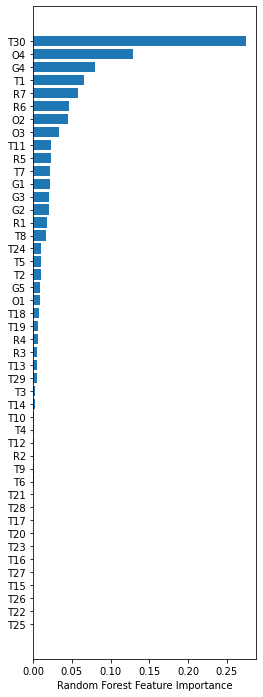

In [65]:
sorted_idx = forest.feature_importances_.argsort()
fig = plt.figure(figsize=(4,12))
plt.barh(x_train.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")



In [66]:
new_train = pd.read_csv('upsample.csv')
new_test = pd.read_csv('test.csv')

In [67]:
new_test

,ID,G1,G2,G3,G4,G5,T1,T2,T3,T4,...,R2,R3,R4,R5,R6,R7,O1,O2,O3,O4
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,3,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,5,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
296,297,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
297,298,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
298,299,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [71]:
threshold = 0.04
x_selected = new_train[new_train.columns[1:47]]
x_selected = x_selected.iloc[:, importance > threshold]
test_select = new_test[new_test.columns[1:]]
test_select = test_select.iloc[:, importance > threshold]

In [72]:
x_selected

,G4,T1,T30,R6,R7,O2,O4
0,1,1,0,1,0,0,0
1,1,1,0,1,0,0,0
2,1,1,0,0,0,0,1
3,1,0,0,0,1,1,0
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
5191,1,1,0,0,1,1,0
5192,0,0,1,0,0,0,1
5193,1,0,0,1,0,0,1
5194,1,0,0,0,1,1,0


In [75]:
test_select

,G4,T1,T30,R6,R7,O2,O4
0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,1
2,1,0,0,1,0,0,0
3,1,0,0,0,1,1,0
4,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...
295,0,0,0,1,0,0,1
296,1,0,1,0,0,0,1
297,1,1,0,0,1,0,1
298,1,0,1,1,0,0,1


In [76]:
train_selected = pd.concat([new_train.ID,x_selected,new_train.Y],axis = 1)

train_selected.to_csv('up_selected.csv', index=False)

In [77]:
test_selected = pd.concat([new_test.ID,test_select],axis = 1)

test_selected.to_csv('test_up_selected.csv', index=False)

In [78]:
test_selected

,ID,G4,T1,T30,R6,R7,O2,O4
0,1,1,0,0,0,0,0,0
1,2,0,0,1,0,1,0,1
2,3,1,0,0,1,0,0,0
3,4,1,0,0,0,1,1,0
4,5,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
295,296,0,0,0,1,0,0,1
296,297,1,0,1,0,0,0,1
297,298,1,1,0,0,1,0,1
298,299,1,0,1,1,0,0,1


In [33]:
threshold = 0.05
x_selected_train = x_train.iloc[:, importance > threshold]
x_selected_train.shape
x_selected_test =x_test.iloc[:, importance > threshold]
x_selected_test.shape

(519, 5)

In [40]:
predicted = []
expected = []
forest.fit(x_selected_train,y_train)
expected.extend(y_test)
predicted.extend(forest.predict(x_selected_test))

In [41]:
print("Macro-average: {0}".format(metrics.f1_score(expected,predicted,average='macro')))
print("Micro-average: {0}".format(metrics.f1_score(expected,predicted,average='micro')))
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy = accuracy_score(expected, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("Average = macro")
print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
print('recall:',metrics.recall_score(expected, predicted,average='macro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='macro'))

print("\n")
print("Average = micro")
print('precision:', metrics.precision_score(expected, predicted, average='micro')) 
print('recall:',metrics.recall_score(expected, predicted,average='micro'))
print('F1-score:',metrics.f1_score(expected, predicted,labels=[1,2,3,4],average='micro'))

print("\n")
print("Average = weighted")
print('precision:', metrics.precision_score(expected, predicted, average='weighted'))
print('recall:',metrics.recall_score(expected, predicted,average='weighted'))
print('F1-score:',metrics.f1_score(expected,predicted,labels=[1,2,3,4],average='weighted'))

Macro-average: 0.6379070880504724
Micro-average: 0.6608863198458574
              precision    recall  f1-score   support

           1       0.52      0.32      0.40       167
           2       0.88      1.00      0.94       176
           3       0.52      0.64      0.58       176

    accuracy                           0.66       519
   macro avg       0.64      0.66      0.64       519
weighted avg       0.64      0.66      0.64       519

[[ 54  10 103]
 [  0 176   0]
 [ 50  13 113]]
Accuracy: 66.09%
Average = macro
precision: 0.6422670093105605
recall: 0.6551329159862095
F1-score: 0.47843031603785424


Average = micro
precision: 0.6608863198458574
recall: 0.6608863198458574
F1-score: 0.6608863198458574


Average = weighted
precision: 0.6444005857281291
recall: 0.6608863198458574
F1-score: 0.6420582401223328


C:\Users\HHW\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\HHW\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [42]:
testset.head()

,ID,G1,G2,G3,G4,G5,T1,T2,T3,T4,...,R2,R3,R4,R5,R6,R7,O1,O2,O3,O4
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,3,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,5,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [43]:
testd = testset[testset.columns[1:]]

In [44]:
testd

,G1,G2,G3,G4,G5,T1,T2,T3,T4,T5,...,R2,R3,R4,R5,R6,R7,O1,O2,O3,O4
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
296,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
297,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
298,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [45]:
testd_select=testd.iloc[:, importance > threshold]

In [24]:
predicted=forest.predict_proba(testd_select)
%precision 3
predicted

array([[5.889e-01, 0.000e+00, 4.111e-01],
       [0.000e+00, 1.000e+00, 0.000e+00],
       [6.388e-01, 0.000e+00, 3.612e-01],
       [6.357e-01, 0.000e+00, 3.643e-01],
       [6.288e-02, 8.166e-01, 1.205e-01],
       [6.609e-01, 0.000e+00, 3.391e-01],
       [0.000e+00, 1.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00],
       [6.922e-01, 0.000e+00, 3.078e-01],
       [6.623e-01, 0.000e+00, 3.377e-01],
       [6.398e-01, 0.000e+00, 3.602e-01],
       [6.609e-01, 0.000e+00, 3.391e-01],
       [6.000e-04, 9.990e-01, 4.000e-04],
       [6.609e-01, 0.000e+00, 3.391e-01],
       [3.757e-02, 9.213e-01, 4.114e-02],
       [6.609e-01, 0.000e+00, 3.391e-01],
       [8.981e-01, 0.000e+00, 1.019e-01],
       [3.757e-02, 9.213e-01, 4.114e-02],
       [5.636e-01, 8.388e-02, 3.526e-01],
       [6.609e-01, 0.000e+00, 3.391e-01],
       [0.000e+00, 1.000e+00, 0.000e+00],
       [6.357e-01, 0.000e+00, 3.643e-01],
       [5.636e-01, 8.388e-02, 3.526e-01],
       [0.000e+00, 1.000e+00, 0.00

In [25]:
predict = pd.DataFrame(predicted, columns = ['C1','C2','C3'])

In [26]:
my_submission = pd.DataFrame({'ID': testset.ID, 'C1':predict.C1, 'C2':predict.C2, 'C3':predict.C3})

my_submission.to_csv('submission.csv', index=False)